#### Mark Labinski
##### Problem Set 2
##### Question 3

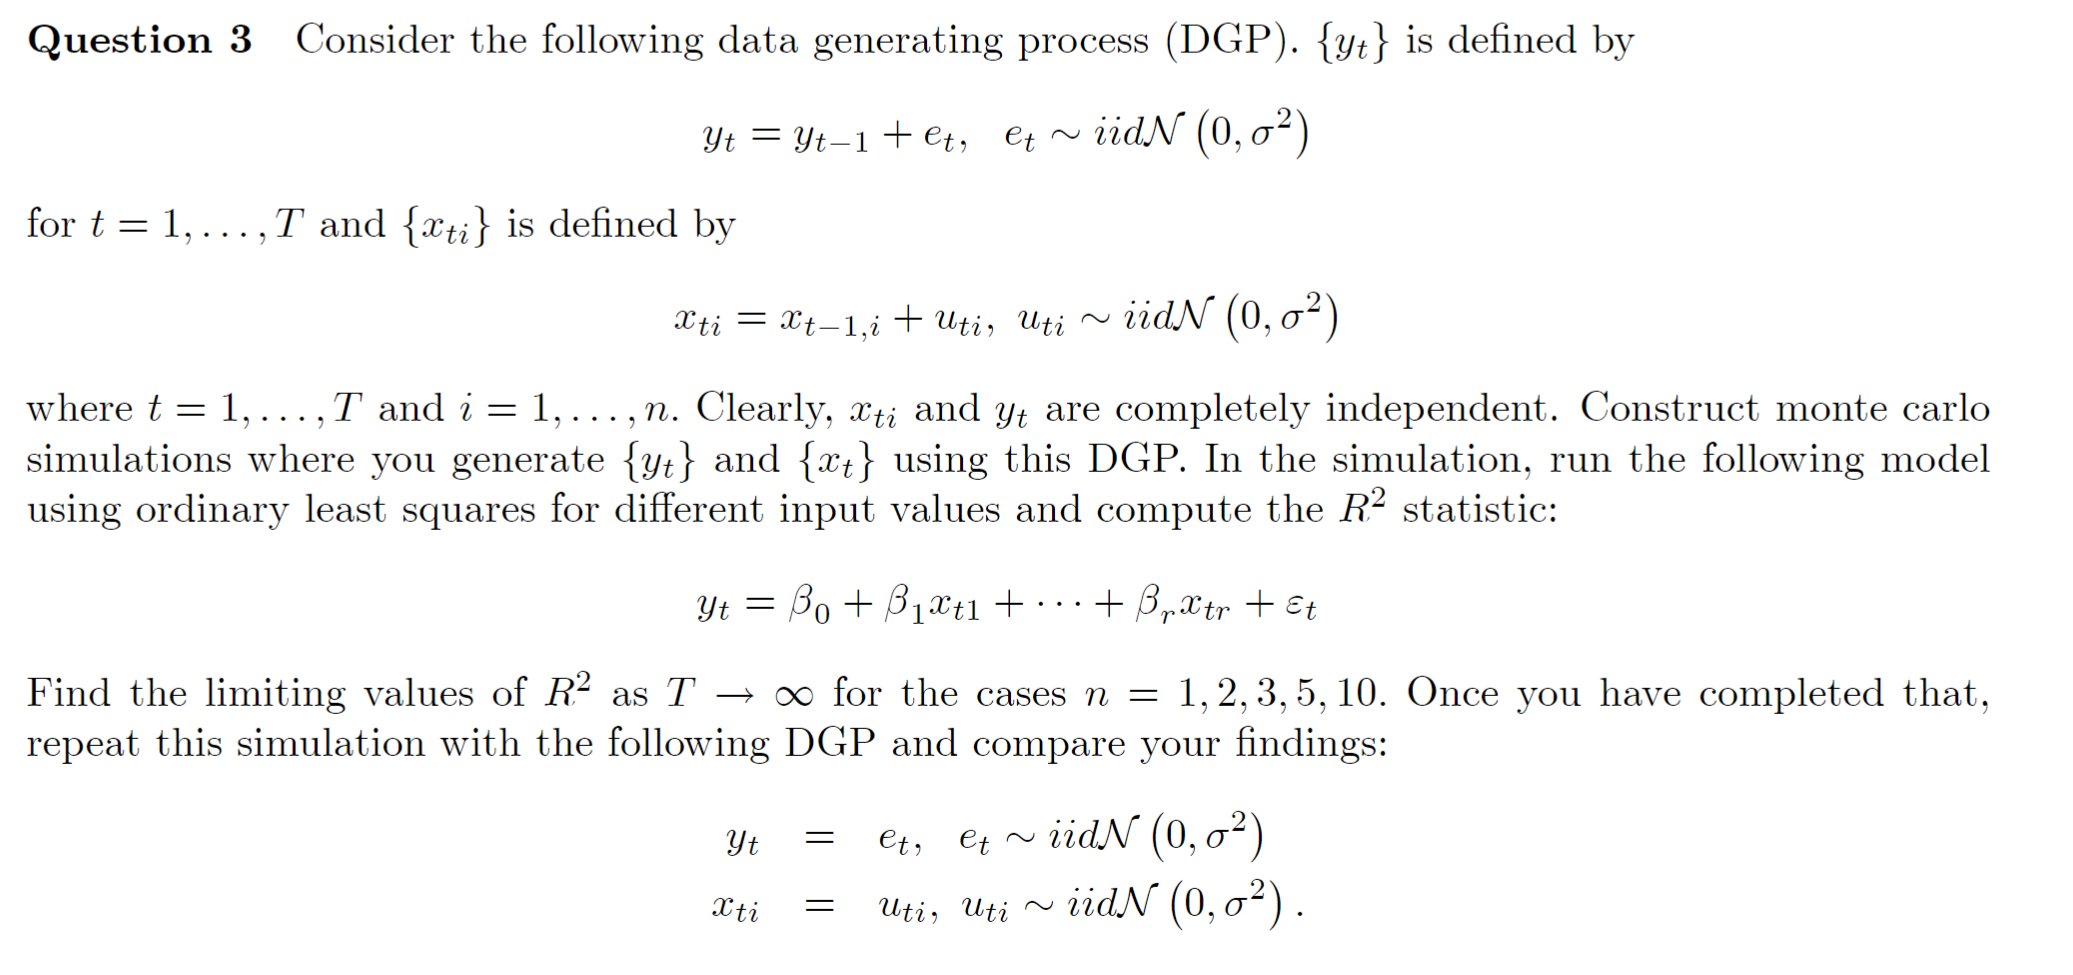

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sig = 0.5
rho=1
nsim = 1000
Tvec = [10,25,50,100,250]
nvec = [1,2,3,5,10]
holding_place = np.zeros((nsim,len(Tvec),len(nvec)))
for ndx,n in enumerate(nvec):
    for tdx,T in enumerate(Tvec):
        for isim in range(nsim):
            y = np.random.normal(0,sig,size=(T,1))
            for t in range(1,T):
                y[t] += rho*y[t-1]
            x = np.random.normal(0,sig,size=(T,n))
            for t in range(1,T):
                x[t] += rho*x[t-1]
            x = sm.add_constant(x)
            model = smf.OLS(y,x).fit()
            holding_place[isim,tdx,ndx] = model.rsquared
df = pd.DataFrame(holding_place.mean(0))
## N represents the  number of independent variables
df.columns = ['N=1','N=2','N=3','N=5','N=10' ]
df


,N=1,N=2,N=3,N=5,N=10
0,0.265192,0.451372,0.579691,0.769377,1.000000
1,0.244263,0.411355,0.509182,0.664991,0.826550
2,0.233296,0.403063,0.499795,0.643820,0.796559
3,0.248158,0.398243,0.519373,0.634340,0.789598
4,0.243874,0.384003,0.504802,0.633965,0.782123


In [4]:
sig = 0.5
rho=1
nsim = 1000
Tvec = [10,25,50,100,250]
nvec = [1,2,3,5,10]
holding_place = np.zeros((nsim,len(Tvec),len(nvec)))
for ndx,n in enumerate(nvec):
    for tdx,T in enumerate(Tvec):
        for isim in range(nsim):
            y = np.random.normal(0,sig,size=(T,1))
            x = np.random.normal(0,sig,size=(T,n))
            x = sm.add_constant(x)
            model = smf.OLS(y,x).fit()
            #np.vstack((x.mean(0),x.std(0))).T
            holding_place[isim,tdx,ndx] = model.rsquared
df1 = pd.DataFrame(holding_place.mean(0))
df1.columns = ['N=1','N=2','N=3','N=5','N=10' ]
df1

,N=1,N=2,N=3,N=5,N=10
0,0.111679,0.205539,0.346018,0.551350,1.000000
1,0.038406,0.079584,0.127485,0.211593,0.417133
2,0.019762,0.040954,0.060440,0.101282,0.205550
3,0.010290,0.021448,0.030700,0.051121,0.102261
4,0.004099,0.008371,0.012620,0.020483,0.038798


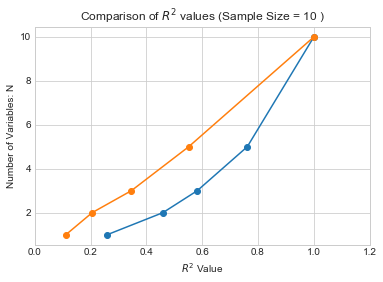

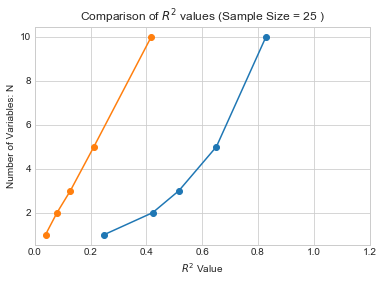

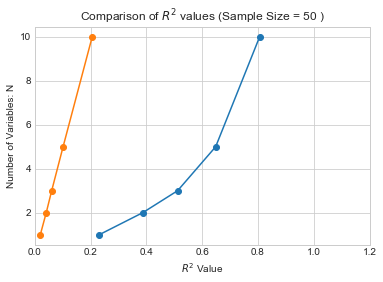

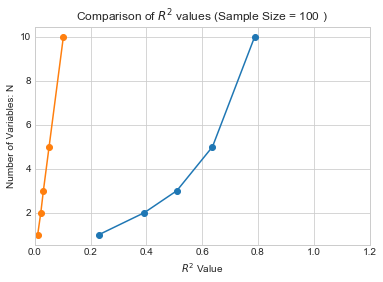

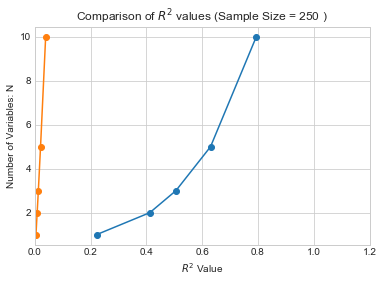

In [5]:
for i in range(5):  
    fig = plt.figure()
    plt.xlim(0,1.2)
    x = df.iloc[i]
    y = [1,2,3,5,10]
    x1 = df1.iloc[i]
    y1 = [1,2,3,5,10]
    plt.plot(x,y,'o-' )
    plt.plot(x1,y1,'o-' )
    plt.title("Comparison of $R^2$ values (Sample Size = %i ) " %Tvec[i] )
    plt.xlabel("$R^2$ Value")
    plt.ylabel("Number of Variables: N")
    plt.show()